# Load in libraries

In [1]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
from PIL import Image
import sys
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
import IPython.display

def ProgressBar(Total, Progress, BarLength=20, ProgressIcon="#", BarIcon="-"):
    try:
        # You can't have a progress bar with zero or negative length.
        if BarLength <1:
            BarLength = 20
        # Use status variable for going to the next line after progress completion.
        Status = ""
        # Calcuting progress between 0 and 1 for percentage.
        Progress = float(Progress) / float(Total)
        # Doing this conditions at final progressing.
        if Progress >= 1.:
            Progress = 1
            Status = "\r\n"    # Going to the next line
        # Calculating how many places should be filled
        Block = int(round(BarLength * Progress))
        # Show this
        Bar = "[{}] {:.0f}% {}".format(ProgressIcon * Block + BarIcon * (BarLength - Block), round(Progress * 100, 0), Status)
        return Bar
    except:
        return "ERROR"


def ShowBar(Bar):
    sys.stdout.write(Bar)
    sys.stdout.flush()
    
def make_gif(frame_folder, gifname, yr, dframe):
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.png"))[0:len(glob.glob(f"{frame_folder}/*.png")):dframe]]
    frame_one = frames[0]
    frame_one.save(gifname + str(yr) + ".gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

SyntaxError: invalid syntax (<ipython-input-1-e5ea1eca28c8>, line 38)

In [5]:
# Plot settings
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

#plt.style.use("seaborn")


plt.style.use('default')
plt.style.use(['science','ieee', 'grid'])
sns.set_context("paper")
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
font_size = 14
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams.update({"axes.grid" : True, "grid.color": [0.6, 0.6, 0.6]})
#sns.color_palette("colorblind",15)

#filename = '/g/data/ia40/sea-ice-classification/kmean_2019.nc'
#ds_mask = xr.open_dataset(filename)
#LT = ds_mask['LAT']
#LN = ds_mask['LON']

#del ds_mask

# Read in cyclone data

In [6]:
csv_file = '/g/data/ia40/cyclone-detection/ERA-tracks/ERA-Interim_cyclone_tracks_1979-2018_south_of_60S.csv'
df = pd.read_csv(csv_file) 
df.head()
#index = df[ (df['year'] < 2010) & (df['year'] <= 2010) ].index
index = df[(df['year'] < 2010)].index
df.drop(index , inplace=True)
df

,# track,point,year,month,day,hour,status,cyclone_number,open_closed_status,matching_probability,longitude,latitude,central_pressure [hPa],laplacian_of_central_pressure [hPa/degree latitude**2],cyclone_depth [hPa],cyclone_radius [degrees latitude],eastward_steering_velocity [m/s],northward_steering_velocity [m/s]
807561,200930580,50,2010,1,1,0,44,62,0,0.975,244.62,-59.96,986.68,1.315,11.300,6.973,2.379,2.349
807562,200930580,51,2010,1,1,6,44,57,0,0.999,247.20,-58.38,987.90,1.347,10.169,6.906,2.112,2.133
807563,200930580,52,2010,1,1,12,44,64,0,0.991,249.90,-56.55,988.12,1.258,9.908,7.019,1.660,2.771
807564,200930580,53,2010,1,1,18,44,67,0,0.993,252.71,-54.81,989.10,1.287,10.488,7.108,1.812,3.169
807565,200930580,54,2010,1,2,0,44,70,0,0.987,256.16,-53.16,989.62,1.294,10.590,7.159,2.369,3.053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049786,201832197,22,2019,1,6,6,44,59,10,0.499,282.58,-67.38,975.05,0.490,2.061,3.354,0.652,-0.015
1049787,201832197,23,2019,1,6,12,44,61,10,0.496,280.72,-67.42,976.96,0.310,1.504,3.282,-0.611,0.338
1049788,201832197,24,2019,1,6,18,44,63,10,0.493,280.95,-66.88,978.78,0.361,1.322,3.436,-1.124,0.886
1049789,201832197,25,2019,1,7,0,44,67,11,0.488,282.62,-66.30,982.06,0.441,2.885,4.262,-1.475,1.032


In [4]:
df.sort_values(by=['central_pressure [hPa]']).head(5)
#df.head(5)

,# track,point,year,month,day,hour,status,cyclone_number,open_closed_status,matching_probability,longitude,latitude,central_pressure [hPa],laplacian_of_central_pressure [hPa/degree latitude**2],cyclone_depth [hPa],cyclone_radius [degrees latitude],eastward_steering_velocity [m/s],northward_steering_velocity [m/s]
1041247,201823961,12,2018,9,5,12,44,65,0,0.996,245.53,-69.41,919.06,4.270,24.655,6.904,-0.521,0.441
829743,201026189,14,2010,10,18,0,44,54,0,0.975,263.09,-60.46,919.64,3.110,19.144,4.558,1.623,5.553
1041248,201823961,13,2018,9,5,18,44,54,0,0.992,245.52,-70.08,919.65,3.703,18.253,5.241,2.557,1.896
829744,201026189,15,2010,10,18,6,44,55,0,0.991,266.57,-60.21,920.22,3.061,21.412,5.631,5.916,3.051
829745,201026189,16,2010,10,18,12,44,53,0,0.973,269.60,-61.05,920.25,2.799,27.082,6.580,4.318,0.163


In [18]:
#df.drop
df['central_pressure [hPa]'].min()

919.06

In [1]:
# Get the top 10 lowest central pressure systems in winter over 2010-2020
csv_file = '/g/data/ia40/cyclone-detection/ERA-tracks/ERA-Interim_cyclone_tracks_1979-2018_south_of_60S.csv'
df = pd.read_csv(csv_file) 
df.head()
index = df[(df['year'] < 2010)].index
df.drop(index , inplace=True)
index = df[(df['month'] < 5)].index
df.drop(index , inplace=True)
index = df[(df['month'] > 9)].index
df.drop(index , inplace=True)
df.sort_values(by=['central_pressure [hPa]']).head(10)

,# track,point,year,month,day,hour,status,cyclone_number,open_closed_status,matching_probability,longitude,latitude,central_pressure [hPa],laplacian_of_central_pressure [hPa/degree latitude**2],cyclone_depth [hPa],cyclone_radius [degrees latitude],eastward_steering_velocity [m/s],northward_steering_velocity [m/s]
1041247,201823961,12,2018,9,5,12,44,65,0,0.996,245.53,-69.41,919.06,4.270,24.655,6.904,-0.521,0.441
1041248,201823961,13,2018,9,5,18,44,54,0,0.992,245.52,-70.08,919.65,3.703,18.253,5.241,2.557,1.896
1041249,201823961,14,2018,9,6,0,44,62,0,0.991,246.03,-70.33,920.38,3.509,19.144,5.022,4.609,2.501
959636,201522333,11,2015,8,18,0,44,49,0,0.983,322.99,-64.30,920.61,3.648,21.204,6.292,1.913,3.151
959635,201522333,10,2015,8,17,18,44,52,0,0.972,318.44,-63.63,921.06,3.534,17.759,5.452,0.836,3.165
819289,201017078,8,2010,6,5,6,44,63,0,0.987,95.70,-61.83,921.89,5.456,41.902,7.181,7.444,0.670
959637,201522333,12,2015,8,18,6,44,49,0,0.974,328.56,-64.82,922.22,3.201,24.133,7.212,1.827,0.729
987809,201624934,11,2016,9,11,6,44,50,0,0.841,74.33,-66.64,922.63,3.125,19.209,4.873,12.805,4.510
819290,201017078,9,2010,6,5,12,44,67,0,0.906,95.87,-62.90,922.94,4.910,40.634,7.308,14.190,1.275
955347,201518361,14,2015,6,22,12,44,58,0,0.995,74.41,-58.56,923.07,2.790,29.028,7.811,1.125,-0.719


In [2]:
# Top 10 storms
track_names = df.sort_values(by=['central_pressure [hPa]']).head(100)['# track'].unique()[0:30]
track_names


array([201823961, 201522333, 201017078, 201624934, 201518361, 201223018,
       201016513, 201219736, 201021644, 201320442, 201625104, 201122505,
       201423575, 201719945, 201022189, 201725355, 201320655, 201521319,
       201724797, 201015895, 201625074, 201021641, 201020215, 201624862,
       201817910, 201320932, 201522154, 201121637, 201115087, 201820808])

In [3]:
# Create a date vector to plot time series
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from datetime import datetime, timedelta

rc('text', usetex=True)
filename = '/g/data/ia40/sea-ice-classification/kmean_2019.nc'
ds = xr.open_dataset(filename)
LT = ds['LAT']
LN = ds['LON']
land_mask = ds['tmask'].where(ds['tmask'][:,:] != 1.) 
del ds

fig = plt.figure(figsize=[width/2, height/2])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = create_map_axis(ax=ax, LN=LN, LT=LT, land_mask=land_mask, draw_labels="all")
ax.set_extent([-180, 180, -90, -20], ccrs.PlateCarree())

cmap = plt.cm.jet
norm = plt.Normalize(vmin=np.min(track_names), vmax=np.max(track_names))

date_start = []
date_end = []

for track_number in tqdm(track_names):
    df_cyclone = pd.read_csv(csv_file) 
    index = df_cyclone[(df_cyclone['# track'] != track_number)].index
    df_cyclone.drop(index , inplace=True)
    
    timesteps,cols = df_cyclone.shape
    timesteps
    dates = []
    hPa = np.zeros(timesteps)
    for idx in range(timesteps):
        temp_date = datetime(df_cyclone['year'].values[idx], df_cyclone['month'].values[idx], df_cyclone['day'].values[idx], 
                             df_cyclone['hour'].values[idx])
        dates.append(temp_date)
        hPa[idx] = df_cyclone['central_pressure [hPa]'].values[idx]
#    print(dates[0])
#    print(dates[-1])
    

    x = df_cyclone["longitude"].values
    y = df_cyclone["latitude"].values

    plt.plot(x, y, transform=ccrs.Geodetic(), linestyle ='-', linewidth=0.25, color=cmap(norm(track_number)))
    
    # Add start date
    plt.text(x[0], y[0], dates[0].strftime('%d-%m-%Y'), fontsize=2, transform=ccrs.Geodetic())
    
    date_start.append(dates[0].strftime('%d-%m-%Y'))
    date_end.append(dates[-1].strftime('%d-%m-%Y'))
    

#cbar = ax.figure.colorbar(label='Track number', norm=norm)

#cb1 = mpl.colorbar.ColorbarBase(cmap=cmap, norm=norm, orientation='vertical')



#ax1.plot(df_cyclone["longitude"],df_cyclone["latitude"], '-', transform=ccrs.PlateCarree())

savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'cyclone_tracks_winter_top30.png', dpi = 1000) 

NameError: name 'width' is not defined

In [92]:
# Get data from the start from 2-5 July 2017 (Case 1 in de Jager, 2022)
csv_file = '/g/data/ia40/cyclone-detection/ERA-tracks/ERA-Interim_cyclone_tracks_1979-2018_south_of_60S.csv'
df = pd.read_csv(csv_file) 
df_july = df
index = df_july[(df_july['year'] != 2017)].index
df_july.drop(index , inplace=True)
index = df_july[(df_july['month'] != 7)].index 
df_july.drop(index , inplace=True)
df_july.head()
#print(df_july['# track'].unique())

[201719546 201719550 201719572 201719590 201719645 201719667 201719692
 201719742 201719758 201719759 201719789 201719807 201719808 201719810
 201719830 201719832 201719833 201719836 201719850 201719860 201719873
 201719874 201719875 201719887 201719889 201719890 201719892 201719906
 201719907 201719909 201719940 201719941 201719942 201719943 201719944
 201719945 201719979 201719980 201719998 201719999 201720016 201720017
 201720018 201720019 201720030 201720033 201720034 201720042 201720044
 201720046 201720060 201720061 201720062 201720063 201720079 201720080
 201720081 201720082 201720098 201720116 201720117 201720118 201720134
 201720152 201720153 201720155 201720156 201720157 201720158 201720172
 201720173 201720174 201720175 201720192 201720204 201720205 201720209
 201720221 201720222 201720239 201720240 201720250 201720251 201720252
 201720266 201720267 201720269 201720309 201720311 201720330 201720332
 201720333 201720347 201720348 201720363 201720366 201720368 201720370
 20172

In [99]:
df_july['# track'].unique()[0:10]
track_number
df_july['# track'].unique().min()

201719546

100%|██████████| 366/366 [07:03<00:00,  1.16s/it]


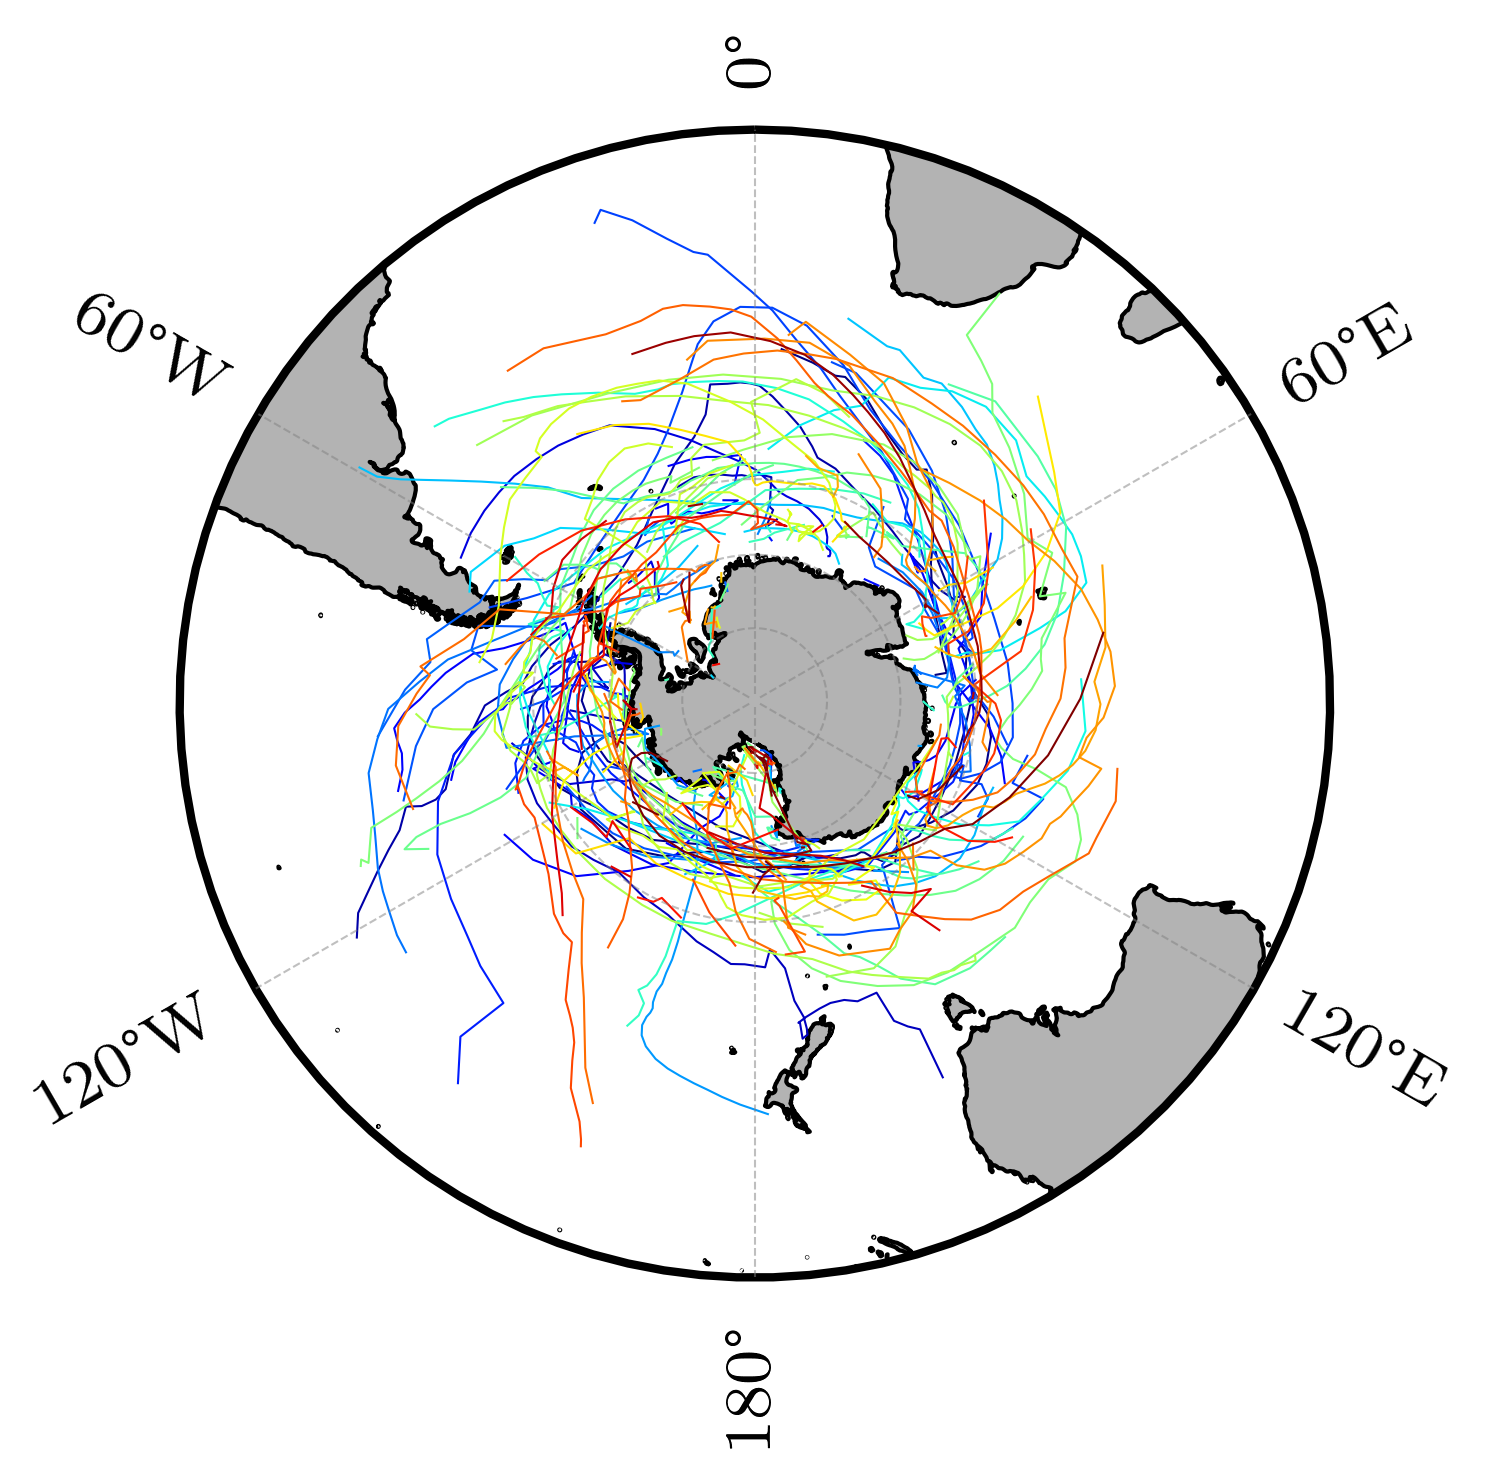

In [116]:
# Create a date vector to plot time series
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from datetime import datetime, timedelta

rc('text', usetex=True)
filename = '/g/data/ia40/sea-ice-classification/kmean_2019.nc'
ds = xr.open_dataset(filename)
LT = ds['LAT']
LN = ds['LON']
land_mask = ds['tmask'].where(ds['tmask'][:,:] != 1.) 
del ds

fig = plt.figure(figsize=[width/2, height/2])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = create_map_axis(ax=ax, LN=LN, LT=LT, land_mask=land_mask, draw_labels="all")
ax.set_extent([-180, 180, -90, -20], ccrs.PlateCarree())



for track_number in tqdm(df_july['# track'].unique()[0:-1:1]):
    df_cyclone = pd.read_csv(csv_file) 
    index = df_cyclone[(df_cyclone['# track'] != track_number)].index
    df_cyclone.drop(index , inplace=True)
    
    timesteps,cols = df_cyclone.shape
    timesteps
    dates = []
    hPa = np.zeros(timesteps)
    for idx in range(timesteps):
        temp_date = datetime(df_cyclone['year'].values[idx], df_cyclone['month'].values[idx], df_cyclone['day'].values[idx], 
                             df_cyclone['hour'].values[idx])
        dates.append(temp_date)
        hPa[idx] = df_cyclone['central_pressure [hPa]'].values[idx]
#    print(dates[0])
#    print(dates[-1])

    x = df_cyclone["longitude"].values
    y = df_cyclone["latitude"].values

    plt.plot(x, y, transform=ccrs.Geodetic(), linestyle ='-', linewidth=0.25, color=cmap(norm(track_number)))
    
cmap = plt.cm.jet
norm = plt.Normalize(vmin=np.min(df_july['# track'].unique()), vmax=np.max(df_july['# track'].unique()))

#cbar = ax.figure.colorbar(label='Track number', norm=norm)

#cb1 = mpl.colorbar.ColorbarBase(cmap=cmap, norm=norm, orientation='vertical')



#ax1.plot(df_cyclone["longitude"],df_cyclone["latitude"], '-', transform=ccrs.PlateCarree())

savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'cyclone_tracks_july_2017_10.png', dpi = 1000) 

In [107]:
np.min(df_july['# track'].unique())

201719546

# Get a single track data

In [91]:
csv_file = '/g/data/ia40/cyclone-detection/ERA-tracks/ERA-Interim_cyclone_tracks_1979-2018_south_of_60S.csv'
df_cyclone = pd.read_csv(csv_file) 
track_number = 201719758
index = df_cyclone[(df_cyclone['# track'] != track_number)].index
df_cyclone.drop(index , inplace=True)
df_cyclone.head(5)

[197900093 197900106 197900123 ... 201832173 201832193 201832197]


,# track,point,year,month,day,hour,status,cyclone_number,open_closed_status,matching_probability,longitude,latitude,central_pressure [hPa],laplacian_of_central_pressure [hPa/degree latitude**2],cyclone_depth [hPa],cyclone_radius [degrees latitude],eastward_steering_velocity [m/s],northward_steering_velocity [m/s]
1009044,201719758,1,2017,6,29,12,24,50,0,0.000,295.95,-46.85,997.65,0.733,5.787,5.697,3.665,0.656
1009045,201719758,2,2017,6,29,18,44,52,0,0.675,300.55,-46.51,995.56,0.948,5.342,5.600,3.085,3.333
1009046,201719758,3,2017,6,30,0,44,44,0,0.969,305.09,-46.42,993.97,1.925,7.996,5.474,2.742,3.450
1009047,201719758,4,2017,6,30,6,44,47,0,0.971,309.17,-46.49,990.80,2.263,9.251,5.603,1.593,3.572
1009048,201719758,5,2017,6,30,12,44,54,0,0.965,313.07,-46.58,989.18,1.953,9.358,6.590,0.681,3.434


array([201719758])

In [67]:
# Create a date vector to plot time series
from datetime import datetime, timedelta

timesteps,cols = df_cyclone.shape
timesteps
dates = []
hPa = np.zeros(timesteps)
for idx in range(timesteps):
    temp_date = datetime(df_cyclone['year'].values[idx], df_cyclone['month'].values[idx], df_cyclone['day'].values[idx], 
                         df_cyclone['hour'].values[idx])
    dates.append(temp_date)
    hPa[idx] = df_cyclone['central_pressure [hPa]'].values[idx]
print(dates[0])
print(dates[-1])

2017-06-29 12:00:00
2017-07-06 12:00:00


# Maps

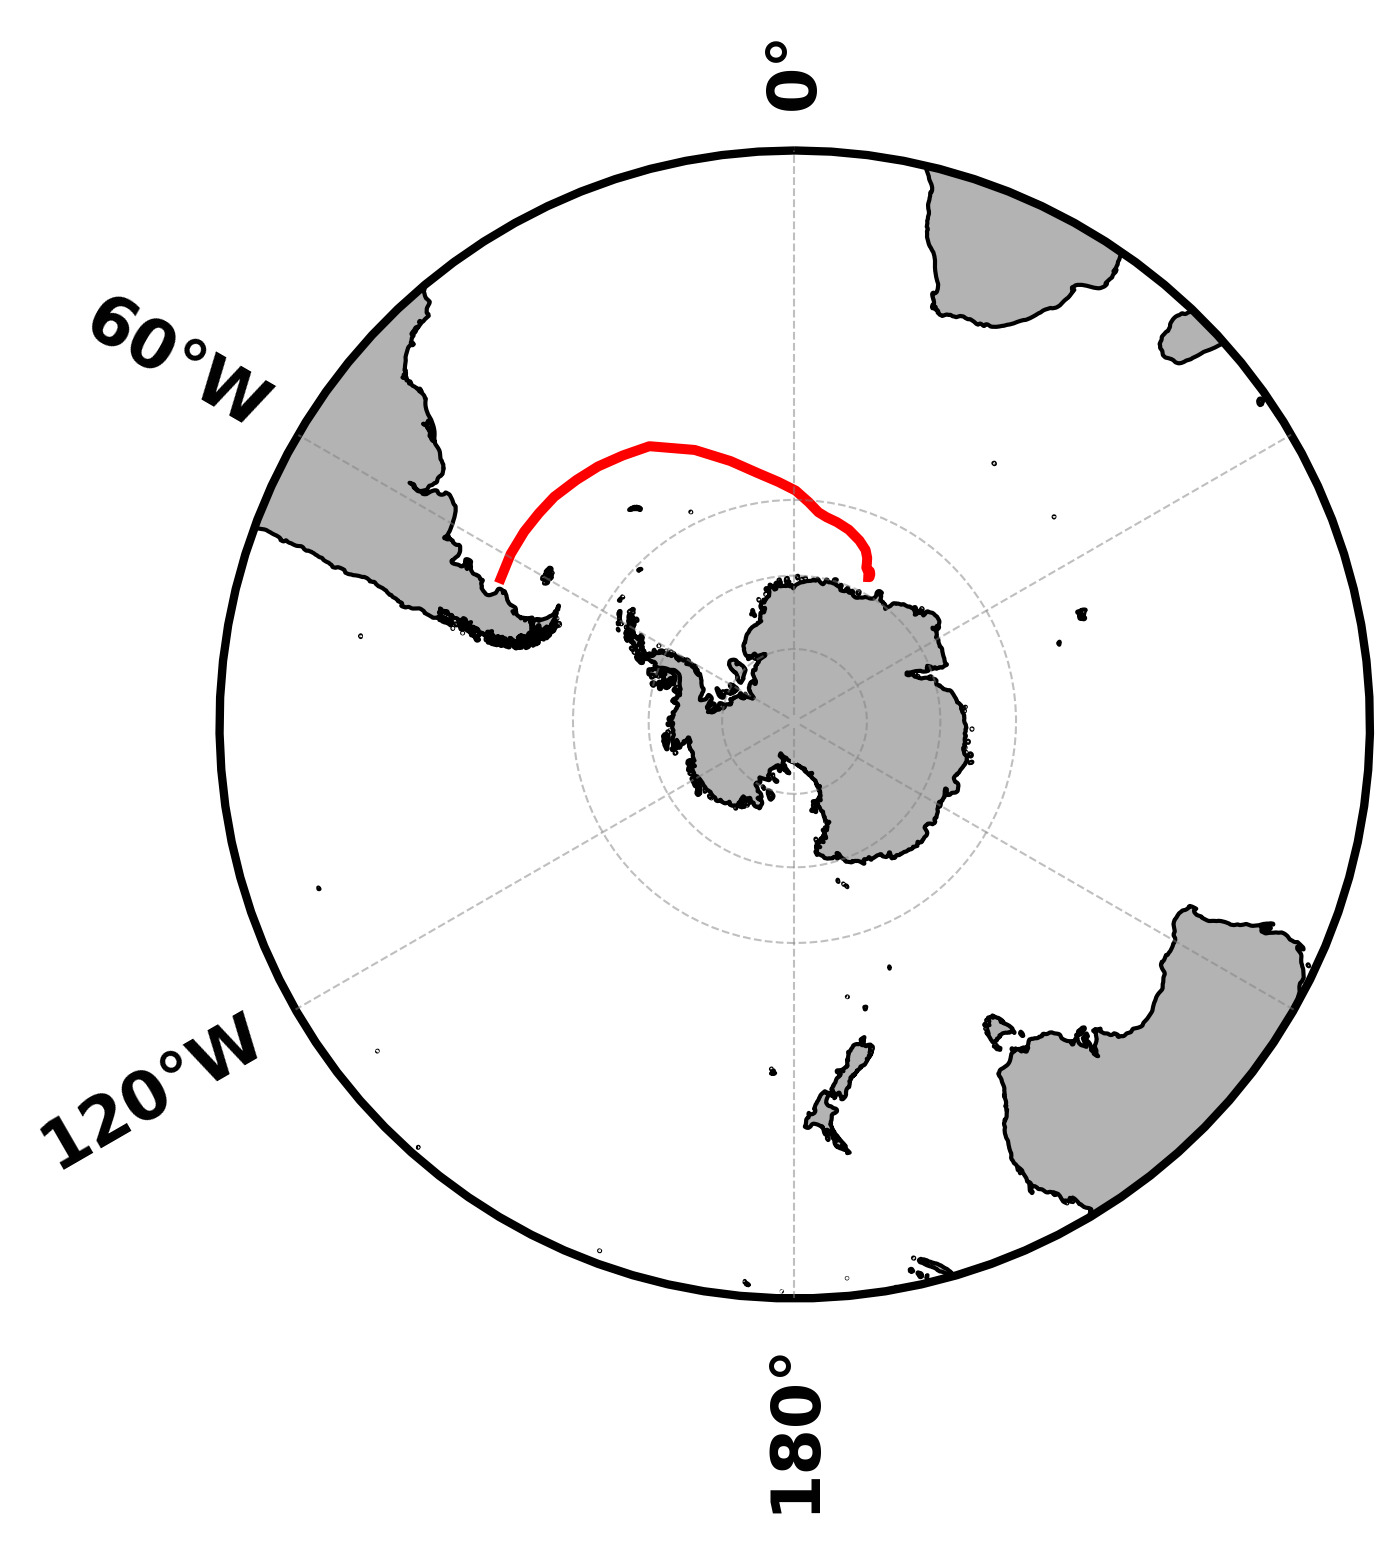

In [87]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

rc('text', usetex=False)

filename = '/g/data/ia40/sea-ice-classification/kmean_2019.nc'
ds = xr.open_dataset(filename)
LT = ds['LAT']
LN = ds['LON']
land_mask = ds['tmask'].where(ds['tmask'][:,:] != 1.) 
del ds


fig = plt.figure(figsize=[width/2, height/2])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = create_map_axis(ax=ax, LN=LN, LT=LT, land_mask=land_mask, draw_labels="left")
ax.set_extent([-180, 180, -90, -20], ccrs.PlateCarree())


#fig.subplots_adjust(bottom=0.05, top=0.95,
#                left=0.04, right=0.95, wspace=0.02)

x = df_cyclone["longitude"].values
y = df_cyclone["latitude"].values
color_var = "central_pressure [hPa]"

plt.plot(x, y, transform=ccrs.Geodetic(), linestyle ='-')

#ax1.plot(df_cyclone["longitude"],df_cyclone["latitude"], '-', transform=ccrs.PlateCarree())

savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'cyclone_track_' + str(track_number) +'.png', dpi = 300) 


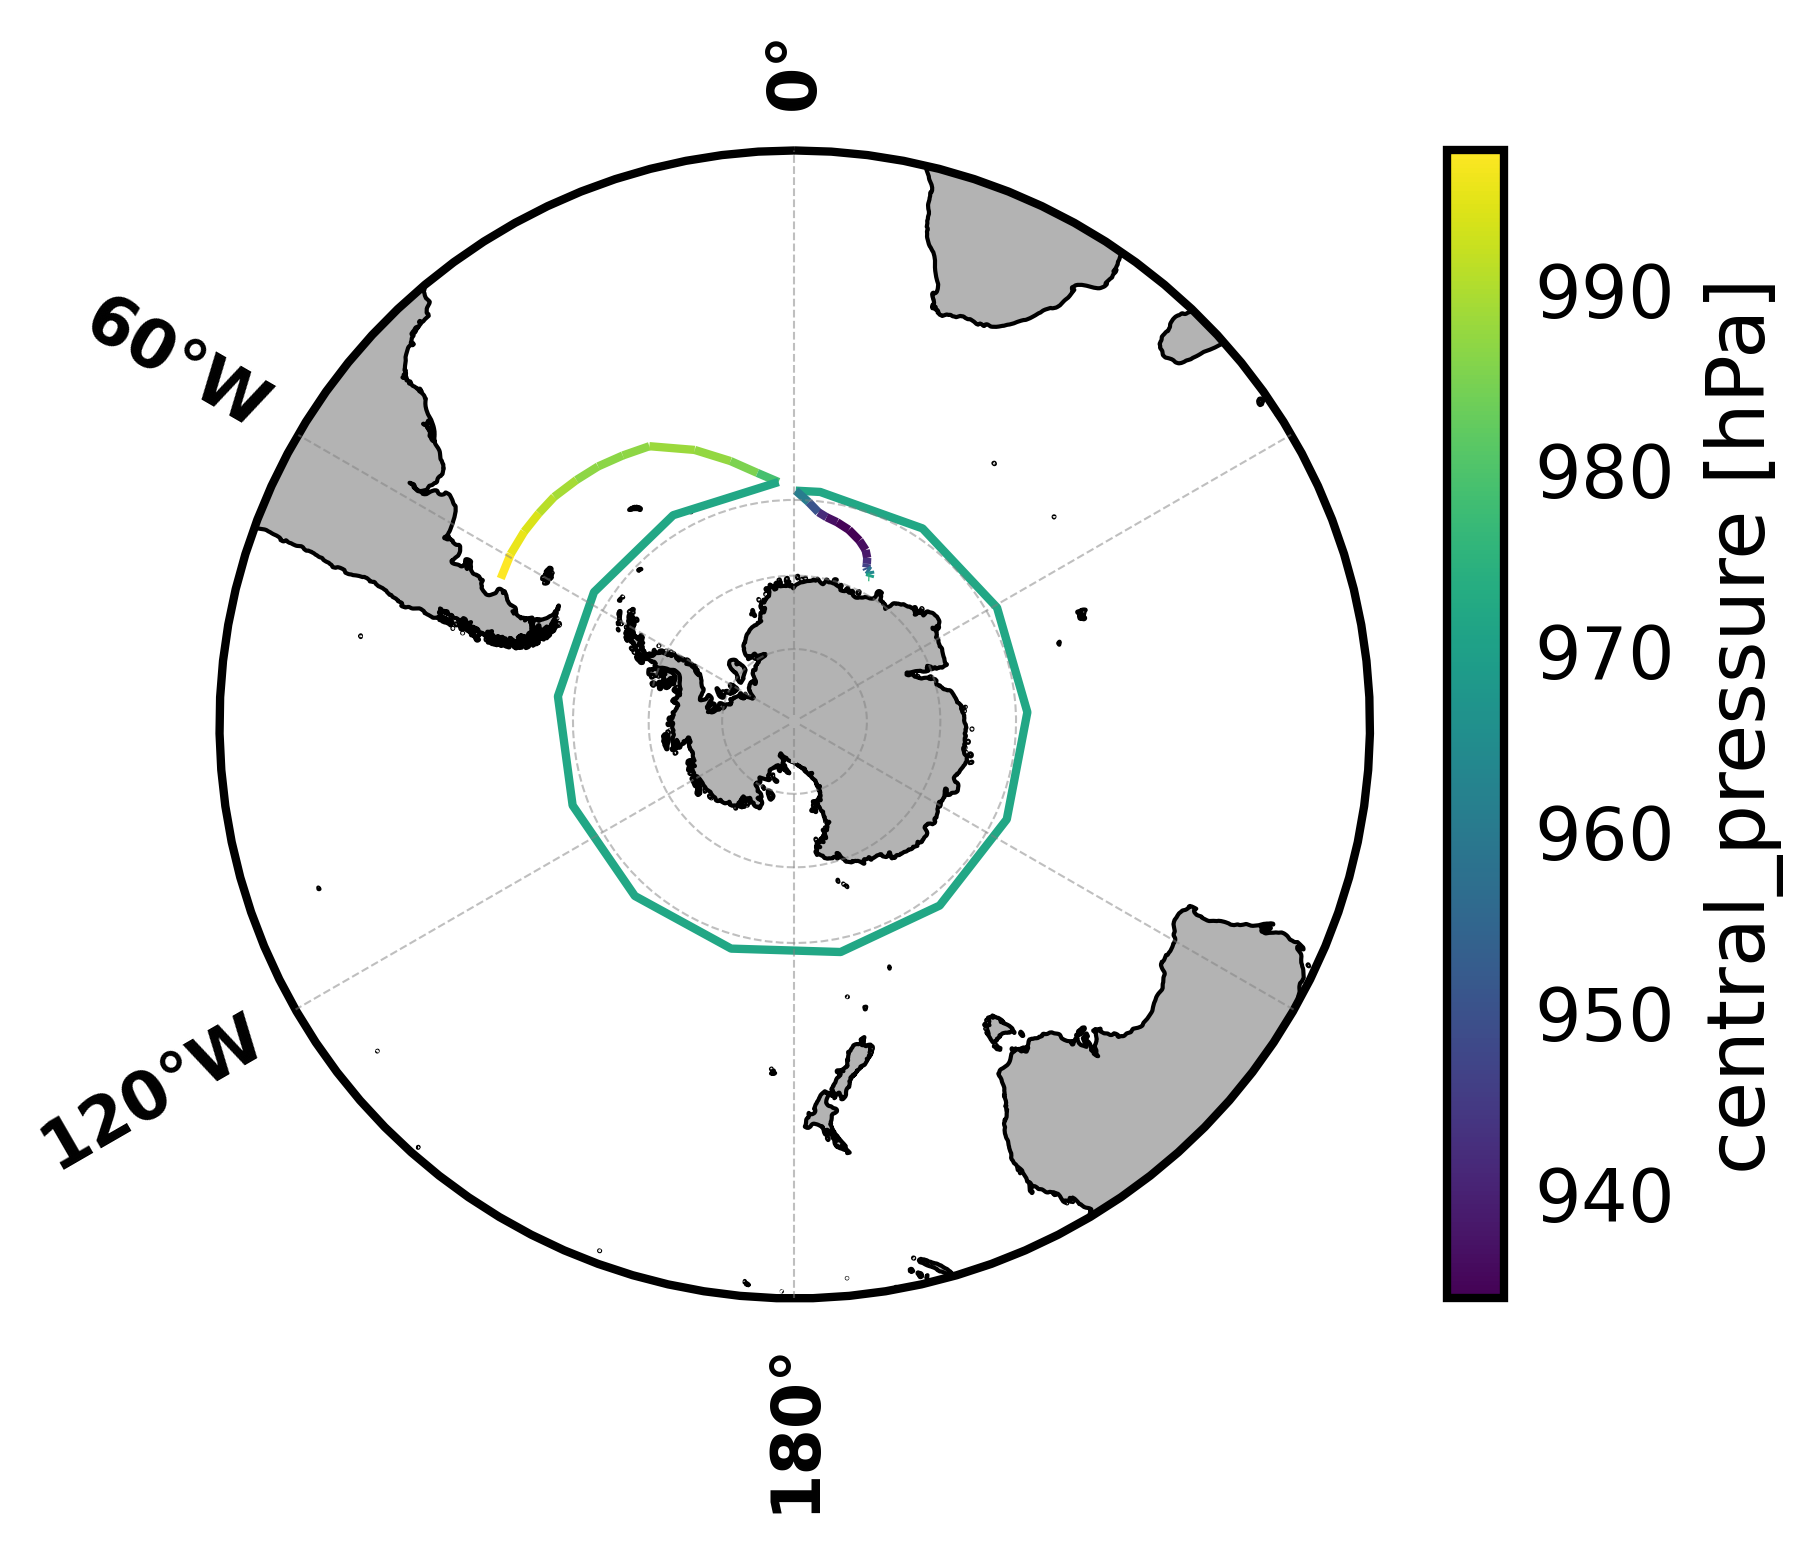

In [85]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

rc('text', usetex=False)

filename = '/g/data/ia40/sea-ice-classification/kmean_2019.nc'
ds = xr.open_dataset(filename)
LT = ds['LAT']
LN = ds['LON']
land_mask = ds['tmask'].where(ds['tmask'][:,:] != 1.) 
del ds


fig = plt.figure(figsize=[width/2, height/2])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = create_map_axis(ax=ax, LN=LN, LT=LT, land_mask=land_mask, draw_labels="left")
ax.set_extent([-180, 180, -90, -20], ccrs.PlateCarree())


#fig.subplots_adjust(bottom=0.05, top=0.95,
#                left=0.04, right=0.95, wspace=0.02)

x = df_cyclone["longitude"].values
x[x < 0] += 360
y = df_cyclone["latitude"].values
color_var = "central_pressure [hPa]"
line_color = df_cyclone[color_var].values 
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(line_color.min(), line_color.max())
lc = LineCollection(segments, cmap='viridis', norm=norm, transform=ccrs.PlateCarree())
# Set the values used for colormapping
lc.set_array(line_color) 
lc.set_linewidth(1)
line = ax.add_collection(lc)
cbar = ax.figure.colorbar(line, ax=ax,
                          label=color_var)
#plt.plot(x, y, transform=ccrs.Geodetic())

#ax1.plot(df_cyclone["longitude"],df_cyclone["latitude"], '-', transform=ccrs.PlateCarree())

savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'cyclone_track_' + str(track_number) +'.png', dpi = 300) 


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

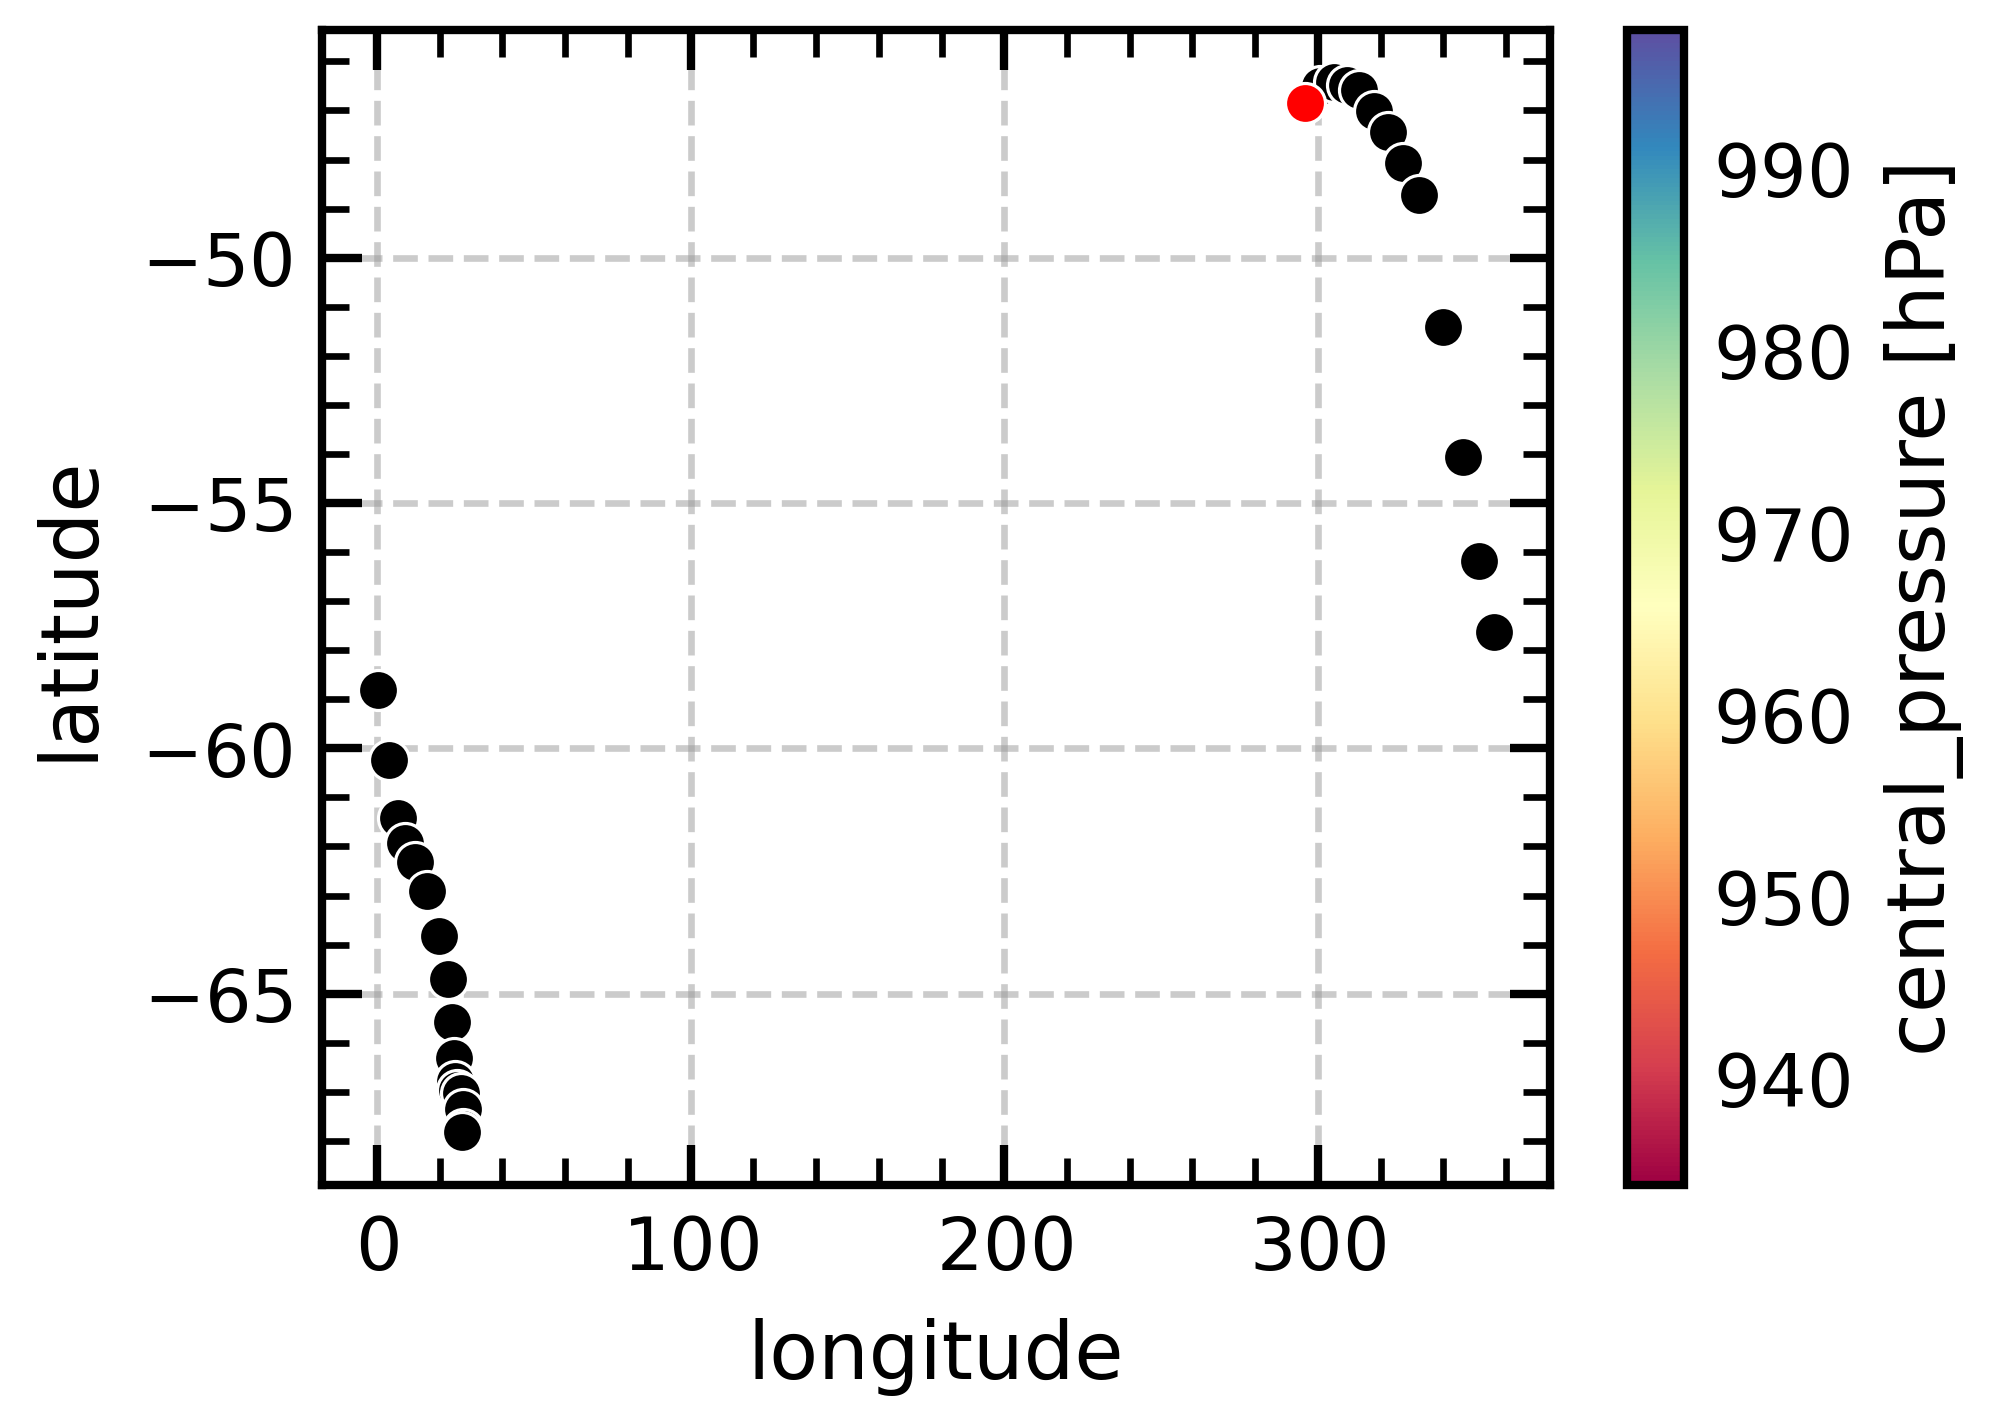

In [68]:
fig = plt.figure()#figsize=[width*2, height*2])
ax = fig.add_subplot(1, 1, 1)
color_var = 'central_pressure [hPa]'
sns.scatterplot(ax=ax, x=df_cyclone["longitude"], y=df_cyclone["latitude"], legend=False)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=df_cyclone[color_var].min(),
                                                                          vmax=df_cyclone[color_var].max(),
                                                                          clip=False),cmap='Spectral'),
                          #ticks=np.arange(df['central_pressure [hPa]'].min(), df['central_pressure [hPa]'].max() + 1),
                          label=color_var)
# Place a dot at the start location
sns.scatterplot(ax=ax,x=[df_cyclone["longitude"].values[0]], y=[df_cyclone["latitude"].values[0]]) 

In [ ]:
fig = plt.figure()#figsize=[width*2, height*2])
ax = fig.add_subplot(1, 1, 1)
color_var = 'cyclone_radius [degrees latitude]'
sns.scatterplot(ax=ax, x=df["month", y="central_pressure [hPa]", hue= color_var, palette='Spectral', legend=False)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=df[color_var].min(),
                                                                          vmax=df[color_var].max(),
                                                                          clip=False),cmap='Spectral'),
                          #ticks=np.arange(df['central_pressure [hPa]'].min(), df['central_pressure [hPa]'].max() + 1),
                          label=color_var)

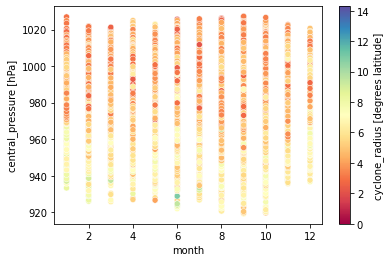

In [59]:
fig = plt.figure()#figsize=[width*2, height*2])
ax = fig.add_subplot(1, 1, 1)
color_var = 'cyclone_radius [degrees latitude]'
sns.scatterplot(ax=ax, data=df, x="month", y="central_pressure [hPa]", hue= color_var, palette='Spectral', legend=False)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=df[color_var].min(),
                                                                          vmax=df[color_var].max(),
                                                                          clip=False),cmap='Spectral'),
                          #ticks=np.arange(df['central_pressure [hPa]'].min(), df['central_pressure [hPa]'].max() + 1),
                          label=color_var)

In [ ]:
fig = plt.figure(figsize=[width*2, height*2])
ax = fig.add_subplot(1, 1, 1)
#sns.color_palette("viridis", as_cmap=True)
sns.lineplot(ax=ax, x=df_july["track"], y=df_july["SIA"], hue = year_vec, linestyle = '-',
             errorbar=None, legend=False, palette='Spectral' #color = COLOR_MIZ
              )
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=year_vec.min(),
                                                                          vmax=year_vec.max(),
                                                                          clip=False),
                                                cmap='Spectral'),
                          ticks=np.arange(year_vec.min(), year_vec.max() + 1),
                          label=r'Year')

set_ax_date(ax, plot_type="clim")
savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_ts_years_1deg.png', dpi = 300) 